>> ### Time Series Forecating Assignment By -->(Flodataanalytics)

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [143]:
df = pd.read_csv('data.csv')
df.head()
## reading the dataset

,RD_NO,CRASH_DATE
0,JG112333,12/31/2022 12:58:00 PM
1,JF528811,12/31/2022 12:55:00 PM
2,JG100569,12/31/2022 12:53:00 PM
3,JF528214,12/31/2022 12:52:00 AM
4,JF528778,12/31/2022 12:47:00 PM


In [144]:
date_list = []
for item in df['CRASH_DATE'].str.split(' '):
    date_list.append(item[0])
    
df['Date'] = date_list    
## extracting Date from CRASH_DATE Columns

In [145]:
df.drop(['CRASH_DATE'],axis=1,inplace=True)
df.head()
## droping CRASH_DATE column

,RD_NO,Date
0,JG112333,12/31/2022
1,JF528811,12/31/2022
2,JG100569,12/31/2022
3,JF528214,12/31/2022
4,JF528778,12/31/2022


In [146]:
df['Date'] = pd.to_datetime(df['Date'])
## converting Date column into Datetime dtype

In [134]:
df.dtypes

RD_NO            object
Date     datetime64[ns]
dtype: object

In [147]:
df['RD_NO'] = df['RD_NO'].astype('O')
df.dtypes
## converting RD_NO column into object

RD_NO            object
Date     datetime64[ns]
dtype: object

In [149]:
df = df.dropna()
df.head(2)
## to drop all none value

,RD_NO,Date
0,JG112333,2022-12-31
1,JF528811,2022-12-31


In [150]:
df = df[df['RD_NO'].str.startswith('JG')]
df.head()
## extracting all the dataelement which start with "JG"

,RD_NO,Date
0,JG112333,2022-12-31
2,JG100569,2022-12-31
26,JG101904,2022-12-31
27,JG102655,2022-12-31
28,JG101906,2022-12-31


In [151]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.head()

# extracting Year and Month from the date

,RD_NO,Date,month,year
0,JG112333,2022-12-31,12,2022
2,JG100569,2022-12-31,12,2022
26,JG101904,2022-12-31,12,2022
27,JG102655,2022-12-31,12,2022
28,JG101906,2022-12-31,12,2022


In [153]:
df2 = df[(df['month']>=4) & (df['month']<=6) & (df['year']==2023)][['RD_NO','Date']]
df2.head()

# sorting the dataset as per the guidance

,RD_NO,Date
245724,JG309851,2023-06-21
247882,JG309908,2023-06-20
247883,JG308518,2023-06-20
247884,JG308498,2023-06-20
247885,JG308560,2023-06-20


In [155]:
df2.shape
## shape of the data after filteration

(25457, 2)

In [156]:
df = df2

In [157]:
clean_data = []
for item in df['RD_NO'].values:
    clean_data.append(item[2:])

df['RD_NO'] = clean_data
df.head()
## removing 'JG' tag from the RD_NO

,RD_NO,Date
245724,309851,2023-06-21
247882,309908,2023-06-20
247883,308518,2023-06-20
247884,308498,2023-06-20
247885,308560,2023-06-20


In [158]:
df = df.sort_values(['Date'])
df.head()

# sorting the dataitem based on the date

,RD_NO,Date
467736,208690,2023-04-01
467559,207420,2023-04-01
467558,207431,2023-04-01
467557,207533,2023-04-01
467556,209551,2023-04-01


In [159]:
#splitting the dataset  of 2023
# train -->  april and may 
# test  -->  jun

df['month'] = df['Date'].dt.month
train = df[(df['month']>=4)&(df['month']<=5)][['RD_NO','Date']]
test  = df[df['month']==6][['RD_NO','Date']]

In [160]:
train.head()

,RD_NO,Date
467736,208690,2023-04-01
467559,207420,2023-04-01
467558,207431,2023-04-01
467557,207533,2023-04-01
467556,209551,2023-04-01


In [161]:
test.head()

,RD_NO,Date
466792,284171,2023-06-01
466793,284191,2023-06-01
466794,284208,2023-06-01
466795,284219,2023-06-01
466796,284234,2023-06-01


In [162]:
## set date as an index

train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [163]:
df['month'].value_counts().index

## only  considederd 3 month for the project
## 2 month for training 1 for testing

Int64Index([5, 4, 6], dtype='int64')

In [165]:
import os
os.makedirs('filter_data',exist_ok=True)
train.to_csv('filter_data/train.csv',index=False)
test.to_csv('filter_data/test.csv',index=False)

# save the filtered data

In [166]:
train.head(20)

,RD_NO
Date,
2023-04-01,208690
2023-04-01,207420
2023-04-01,207431
2023-04-01,207533
2023-04-01,209551
2023-04-01,218494
2023-04-01,207634
2023-04-01,207491
2023-04-01,207436


In [167]:
train.index.unique()

## all are unique Date present in the dataset after filtering

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06',
               '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10',
               '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-14',
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
      

<AxesSubplot:xlabel='Date'>

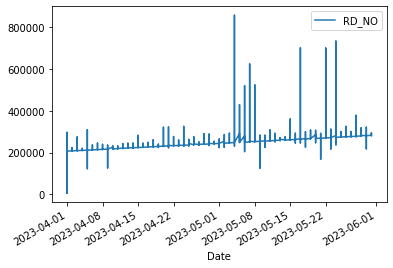

In [168]:
##### performing Time Series analysis

train['RD_NO'] = train['RD_NO'].astype('int')
train.plot()

## ploting the plot to check the seasionality of the dat

In [169]:
# statistical test to check the sesionality of the data

test_result=adfuller(train['RD_NO'])

In [170]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("reject the null hypothesis. Data is seasional")
    else:
        print("accepted alternate hypothesis data is non seasional ")
    

In [171]:
adfuller_test(train['RD_NO'])

# so my data is  non seasional data
# it is cleared by adfuller test, based on the p_value

ADF Test Statistic : -1.4056246100190677
p-value : 0.5795766589660839
#Lags Used : 45
Number of Observations Used : 19026
accepted alternate hypothesis data is non seasional 


In [175]:
########### Transforming non seasional to seasional formate

train['Seasonal First Difference'] = train['RD_NO'] - train['RD_NO'].shift(1)

In [176]:
train.head()

,RD_NO,Seasonal First Difference
Date,,
2023-04-01,208690,NaN
2023-04-01,207420,-1270.0
2023-04-01,207431,11.0
2023-04-01,207533,102.0
2023-04-01,209551,2018.0


In [177]:
## Again check the adfuller test

adfuller_test(train['Seasonal First Difference'].dropna())

### now i transformed this dataset inton seasional dataset

ADF Test Statistic : -35.183279700217966
p-value : 0.0
#Lags Used : 45
Number of Observations Used : 19025
reject the null hypothesis. Data is seasional


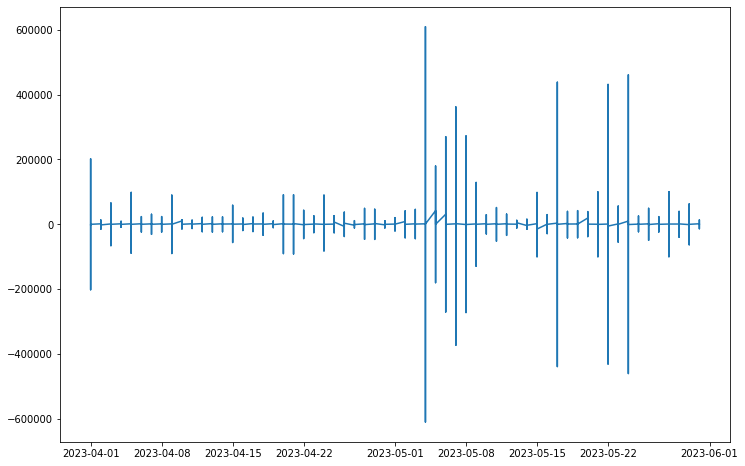

In [178]:
plt.figure(figsize=(12,8))
plt.plot(train['Seasonal First Difference'])

# as you can see clearly my data is seasional

In [179]:
import statsmodels.api as sm
## to plot pcaf,acaf

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


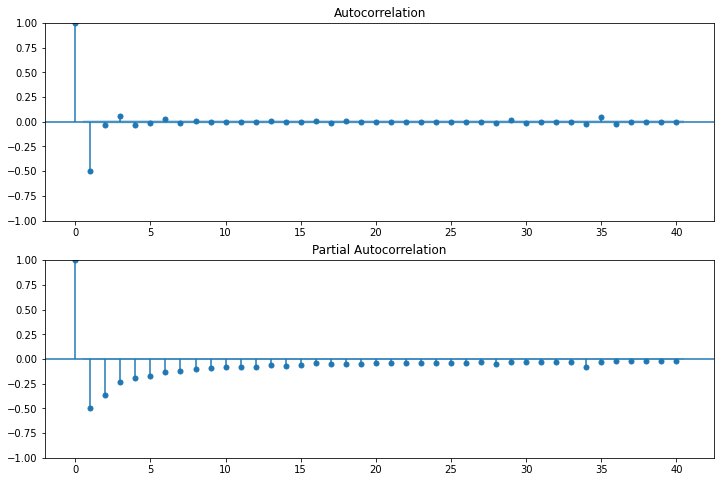

In [180]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Seasonal First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Seasonal First Difference'].iloc[1:],lags=40,ax=ax2)

In [181]:

#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

In [244]:
# fiting the SARIMA Model because our dataset is not seasional datset.
# and SARIMA work well on non-seasional dataset

model=sm.tsa.statespace.SARIMAX(train['RD_NO'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
results=model.fit()

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [245]:
results.summary()
# printing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             RD_NO   No. Observations:                19072
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood             -207178.767
Date:                           Thu, 20 Jul 2023   AIC                         414367.533
Time:                                   22:23:25   BIC                         414406.812
Sample:                                        0   HQIC                        414380.414
                                         - 19072                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.010      4.481      0.000       0.026       0.067
ma.L1         -0.9961      0.003   -308.324      0.000      -1.002      -0.990
ar.S.L2        0.0196      0.019      1.057      0.291      -0.017       0.056
ma.S.L2       -0.9990      0.002   -525.829      0.000      -1.003      -0.995
sigma2      3.196e+08   3.29e-11   9.73e+18      0.000     3.2e+08     3.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):        2071083172.84
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            31.28
Prob(H) (two-sided):                  0.00   Kurtosis:                      1616.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+33. Standard errors may be unstable.
"""

In [275]:
forecast = results.get_forecast(steps=6385) 
## forecasting the next 6385  datapoint of jun MONTH
## because 6385 are datapoint to evalution the prediction

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [187]:
results

In [276]:
forecast_values = forecast.predicted_mean

In [281]:
forecast_values.values
# all are forecasted result

array([283346.24918911, 283423.26118872, 283414.38969354, ...,
       307675.83761194, 307711.62406804, 307683.4426718 ])

In [280]:
len(forecast_values.values)
# len of forecast result

6385

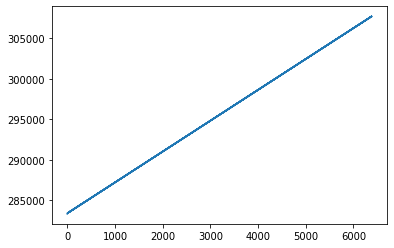

In [282]:
plt.plot(forecast_values.values)
## forcasted result in linear fashion

In [290]:
compare = pd.DataFrame({'JUN_RD_NO_TP':test['RD_NO'].values,'JUN_RD_NO_forecaset':forecast_values.values})
## prepare a pandas dataframe to evaluate the forecasting

In [291]:
compare
## this dataframe containing actual datapoint of jun month and predicted point of jun month
# actual data point of jun month    -->       JUN_RD_NO_TP
# predicted data point of jun month -->       JUN_RD_NO_forecaset

,JUN_RD_NO_TP,JUN_RD_NO_forecaset
0,284171,283346.249189
1,284191,283423.261189
2,284208,283414.389694
3,284219,283451.074856
4,284234,283423.275901
...,...,...
6380,308866,307668.232552
6381,308868,307704.019008
6382,308802,307675.837612
6383,308855,307711.624068


In [292]:
compare['JUN_RD_NO_TP'] = compare['JUN_RD_NO_TP'].astype('int')
# converting into int to for evaluation

In [293]:
compare.dtypes

JUN_RD_NO_TP             int32
JUN_RD_NO_forecaset    float64
dtype: object

In [296]:
compare.describe()
# as you can see statistical analysis on both columns
# MEAN of both columns are approximately same, which means model worked well
##

,JUN_RD_NO_TP,JUN_RD_NO_forecaset
count,6385.000000,6385.000000
mean,296646.428504,295561.743399
std,14549.997393,7009.377912
min,0.000000,283346.249189
25%,289771.000000,289492.139478
50%,296384.000000,295560.977249
75%,303128.000000,301629.815020
max,968865.000000,307711.624068


In [305]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [304]:
np.sqrt(mean_squared_error(compare['JUN_RD_NO_TP'],compare['JUN_RD_NO_forecaset']))

# root mean squared error. is little bit high deu to outliers
# but overall performance of model is fine

12525.934463407793

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JUN_RD_NO_TP'>

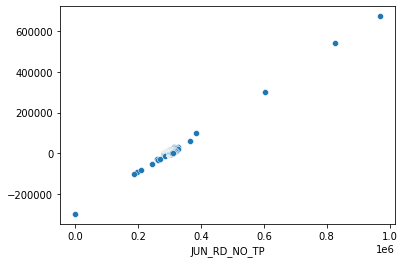

In [307]:
sns.scatterplot(compare['JUN_RD_NO_TP'],compare['JUN_RD_NO_TP']-compare['JUN_RD_NO_forecaset'])
## linear relationship in assumption

<AxesSubplot:>

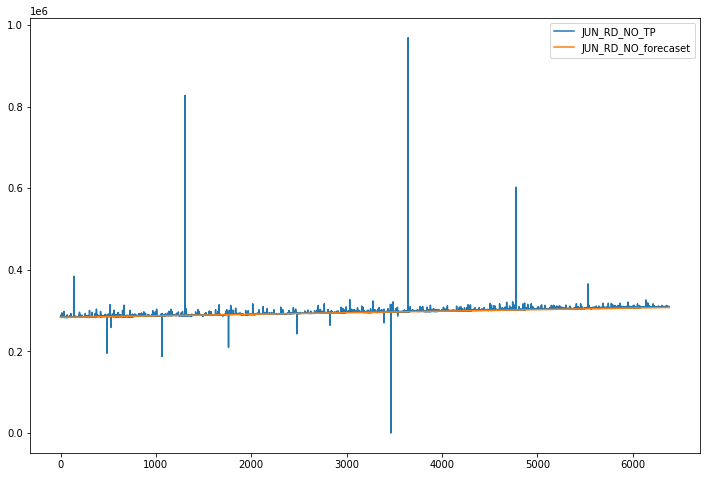

In [298]:

compare[['JUN_RD_NO_TP','JUN_RD_NO_forecaset']].plot(figsize=(12,8))
## visualization chart for the forecast point with actual point
## so our model is fitting with very good performance, we can easily see it

### THANK YOU 😊

<p style="text-align:center">smartengineer0786@gmail.com</p>